# Exercise 7 - Geometric transformations and landmark based registration

In [43]:
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
import numpy as np
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
import seaborn as sns
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt


from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

In [44]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

## Image rotation

One of the most useful and simple geometric transformation is rotation, where an image is rotated around a point.

We start by some experiments on the image called NusaPenida.png. It can be found in the exercise material

**Exercise 1**
Read the NusaPenida.png image and call it im_org. It can be rotated by:

(800, 600, 3)

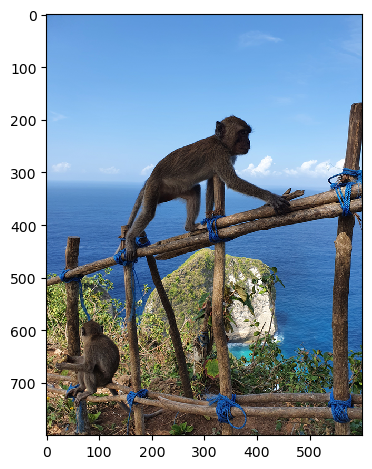

In [3]:
in_dir = "../Ex7-GeometricTransformationsAndRegistration/data"
im_name = "/NusaPenida.png"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
im_org.shape

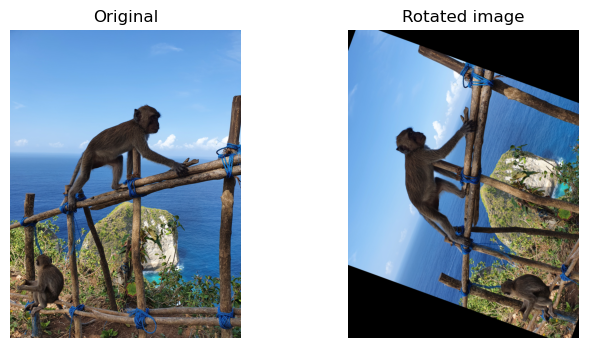

In [82]:
# angle in degrees - counter clockwise
rotation_angle = 70
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

Notice, that in this function, the angle should be given in degrees.

By default, the image is rotated around the center of the image. This can be changed by manually specifying the point that the image should be rotated around (here (0, 0)):

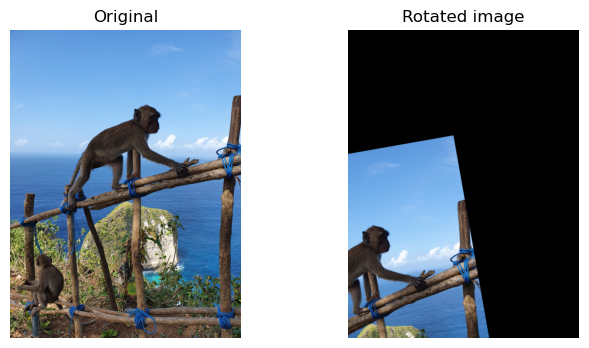

In [13]:
rot_center = [2000, 2000]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image")

**Exercise 2**

Experiment with different center points and notice the results.

As seen, there are areas of the rotated image that is filled with a background value. It can be controlled how this background filling shall behave.

Here the background filling mode is set to reflect

**Exercise 3**
Try the rotation with background filling mode reflect and wrap and notice the results and differences.

It is also possible to define a constant fill value. Currently, sci-kit image only supports a single value (not RGB).

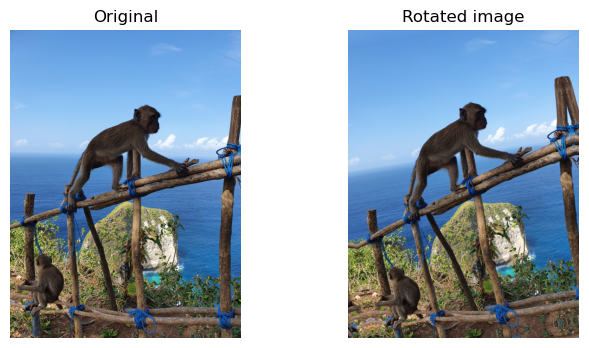

In [15]:
rotated_img = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

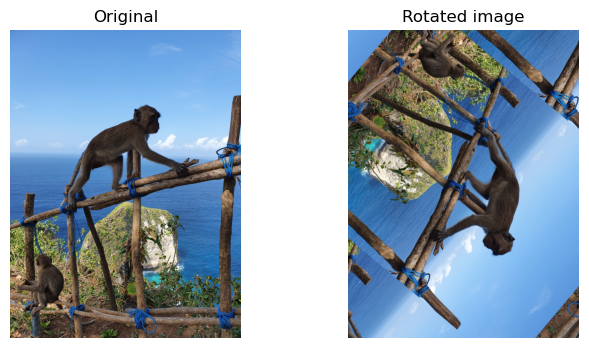

In [25]:
rotation_angle=230
rotated_img = rotate(im_org, rotation_angle, mode="wrap") #reflect
show_comparison(im_org, rotated_img, "Rotated image")
#el modo wrap es raro como que pone cosas donde no son 

**Exercise 4**
Try to use:

rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
with different values of cval and notice the outcomes.

By default, the rotated output image has the same size as the input image and therefore some parts of the rotated image are cropped away. It is possible to automatically adjust the output size, so the rotated image fits into the resized image.

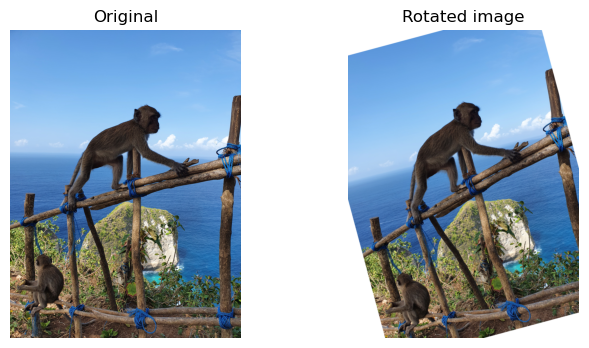

In [46]:
rotation_angle=15
rotated_img = rotate(im_org, rotation_angle, resize=False, mode="constant", cval=1)
show_comparison(im_org, rotated_img, "Rotated image")
#no se para q se usa cval??

**Exercise 5**

Test the use of automatic resizing:

rotated_img = rotate(im_org, rotation_angle, resize=True)

also combine resizing with different background filling mode.

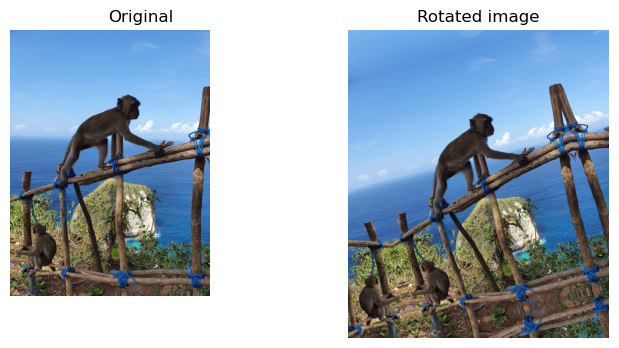

In [40]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

## Euclidean image transformation

An alternative way of doing geometric image transformations is to first construct the transformation and then apply it to the image. We will start by the Euclidean image transformation that consists of a rotation and a translation. It is also called a rigid body transformation.

**Exercise 6**

Start by defining the transformation:

In [59]:
# angle in radians - counter clockwise
rotation_angle = 40.0 * math.pi / 180.
trans = [20, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.76604444 -0.64278761 20.        ]
 [ 0.64278761  0.76604444 20.        ]
 [ 0.          0.          1.        ]]


it can be seen in the print statement that the transformation consists of a 3 x 3 matrix. The matrix is used to transform points using homogenous coordinates. Notice that the angle is defined in radians in this function.

**Exercise 7**

The computed transform can be applied to an image using the warp function:

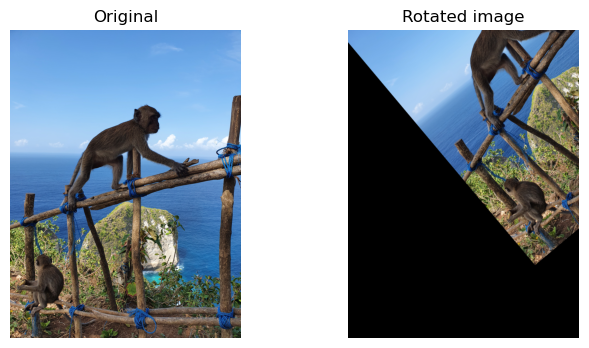

In [65]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rotated image")
#la he rotato y la he trasladado a las coordinadas que quiero

## Inverse transformation

It is possible to get the inverse of a computed transform by using tform.inverse. An image can then be transformed using the invers transform by:

transformed_img = warp(im_org, tform.inverse)


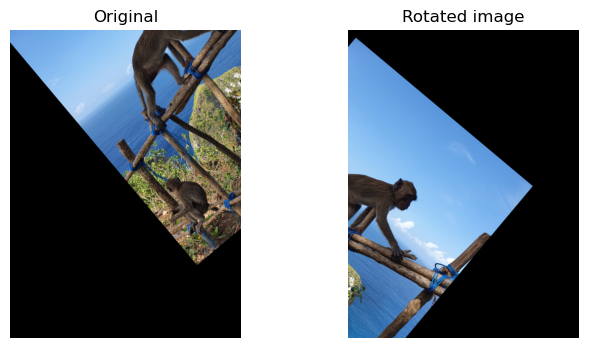

In [66]:
transformed_img2 = warp(im_org, tform.inverse)
show_comparison(transformed_img, transformed_img2, "Rotated image")
# esto me da la inversa de la trasnformacion que yo he creado

**Exercise 8**

Construct a Euclidean transformation with only rotation. Test the transformation and the invers transformation and notice the effect.

In [86]:
rotation_angle = 30.0 * math.pi / 180.
tform = EuclideanTransform(rotation=rotation_angle)
print(tform.params)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


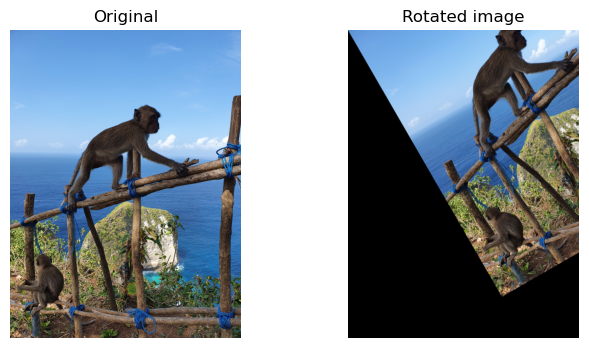

In [87]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rotated image")

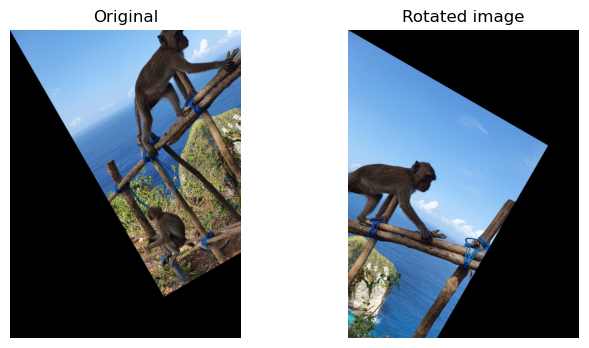

In [88]:
transformed_img3 = warp(im_org, tform.inverse)
show_comparison(transformed_img, transformed_img3, "Rotated image")

## Similarity transform of image
The SimilarityTransform computes a transformation consisting of a translation, rotation and a scaling.

**Exercise 9**

Define a SimilarityTransform with an angle of 15
, a translation of (40, 30) and a scaling of 0.6 and test it on the image.

In [119]:
rotation_angle = 15.0 * math.pi / 180.
trans = [40, 30]
scaling = 0.6
tform = SimilarityTransform(rotation=rotation_angle, translation=trans, scale= scaling)
print(tform.params)

[[ 0.5795555  -0.15529143 40.        ]
 [ 0.15529143  0.5795555  30.        ]
 [ 0.          0.          1.        ]]


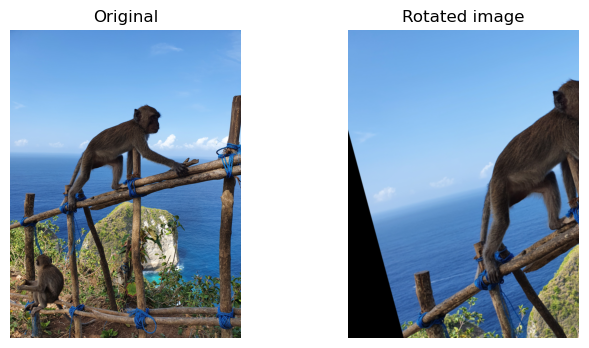

In [120]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rotated image")
#scale hace mas grande/pequeña la imagen

## The swirl image transformation
The swirl image transform is a non-linear transform that can create interesting visual results on images.

**Exercise 10**

Try the swirl transformation:

In [134]:
str = 2
rad = 900
swirl_img = swirl(im_org, strength=str, radius=rad)

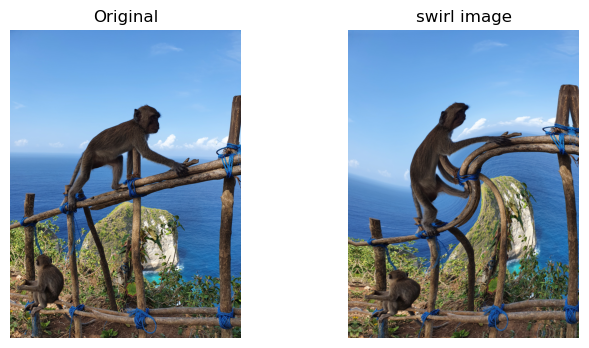

In [135]:
show_comparison(im_org, swirl_img, "swirl image")

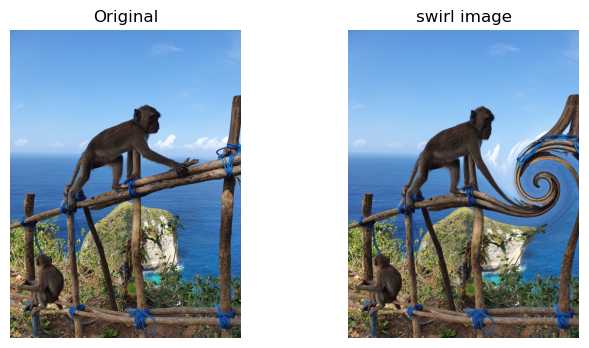

In [136]:
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, "swirl image")

## Landmark based registration
The goal of landmark based registration is to align two images using a set of landmarks placed in both images. The landmarks need to have correspondence meaning that the landmarks should be placed on the same anatomical spot in the two images.

There are two photos of hands: Hand1.jpg and Hand2.jpg and the goal is to transform Hand1 so it fits on top of Hand2. In this exercise we call Hand1 one for the source (src) and Hand2 for the destination (dst).

**Exercise 11**
Start by reading the two images into src_img and dst_img. Visualize their overlap by:

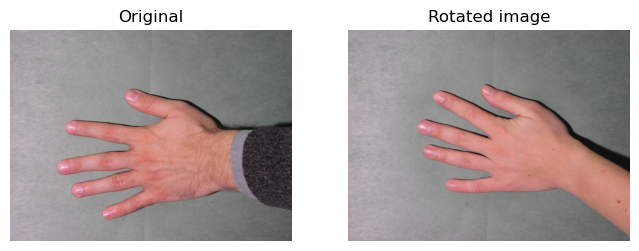

In [142]:
in_dir = "./data"
im_name1 = "/Hand1.jpg"
im_name2 = "/Hand2.jpg"

src_img = io.imread(in_dir + im_name1)
dst_img = io.imread(in_dir + im_name2)

show_comparison(src_img, dst_img, "Rotated image")

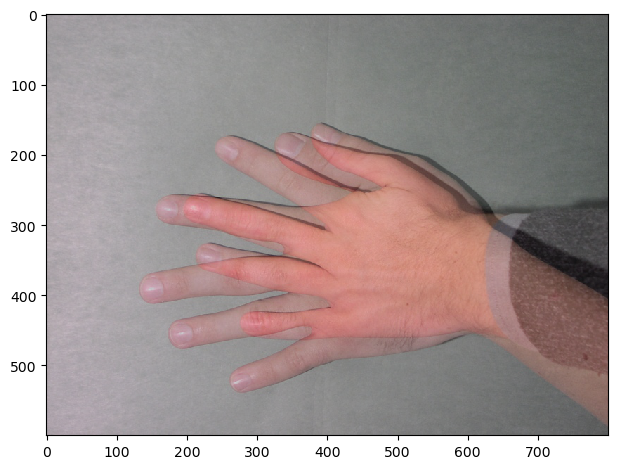

In [143]:
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

## Manual landmark annotation
We will manually placed landmarks on the two images to align the them.

**Exercise 12**
We have manually placed a set of landmarks on the source image. They can be visualized by:

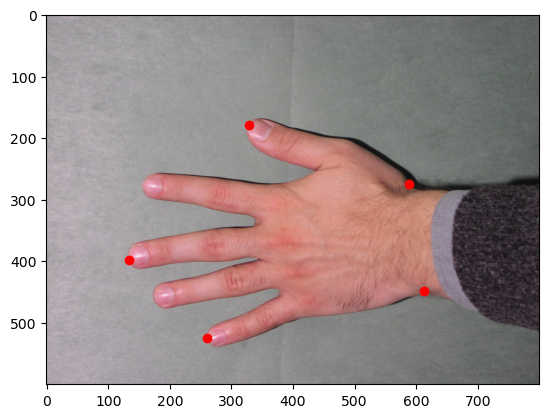

In [144]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

**Exercise 13**

You should now place the same landmarks on the destination image.

In imshow you can see the pixel coordinates of the cursor:

NameError: name 'dst' is not defined

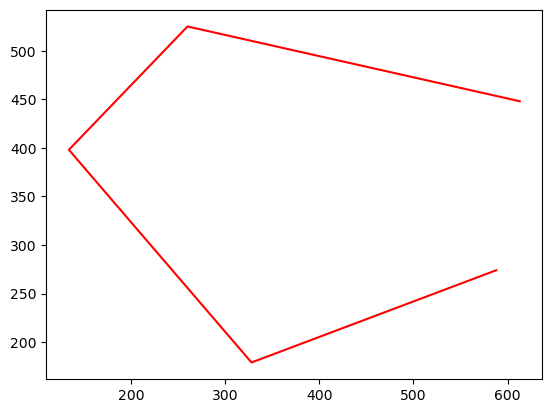

In [145]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

python: can't open file 'C:\\Users\\Usuario\\dtu\\analisisImagenRoot\\exercises\\Ex7-GeometricTransformationsAndRegistration\\Ex7-VideoImageTransformations.py': [Errno 2] No such file or directory


**Exercise 14**

Compute from your landmarks. It can for example be done like:

In [150]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

NameError: name 'dst' is not defined

The optimal Euclidean transformation that brings the source landmarks over in the destination landmarks can be found by:



In [151]:
tform = EuclideanTransform()
tform.estimate(src, dst)

NameError: name 'dst' is not defined

The found transform can be applied to the source points by:



In [152]:
src_transform = matrix_transform(src, tform.params)

NameError: name 'matrix_transform' is not defined